## Basicos de Python

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
#import seaborn as sns
#sns.set_theme()

In [ ]:
def FormulaGeneral(a,b,c):
  if a <= 0:
    return "Error with a "
  else:
    x1 = (-b + np.sqrt(b**2 -4*a*c))/(2*a)
    x2 = (-b - np.sqrt(b**2 -4*a*c))/(2*a)

  return x1, x2

In [ ]:
a = int(input("Valor de a: "))
b= int(input("Valor de b: "))
c = int(input("Valor de c: "))

Valor de a: 1
Valor de b: 3
Valor de c: -4


In [ ]:
raices = FormulaGeneral(a,b,c)
print(raices)

(1.0, -4.0)


In [ ]:
def potencia(x, exp):
  if exp>0 :
    return x**exp
  else:
    return "Not positive"

In [ ]:
for i in range(0,5):
  print(potencia(3, i))


Not positive
3
9
27
81


In [ ]:
nombres = ["Alma", "Tania", "Michel"]

In [ ]:
for nombre in nombres:
  print(nombre)

Alma
Tania
Michel


In [ ]:
x_array = np.array([0,1,2,3,4,5,6])

In [ ]:
potencia(x_array, 2)

array([ 0,  1,  4,  9, 16, 25, 36])

In [ ]:
xceros = np.zeros(len(x_array))
for num, i in enumerate(x_array): #enumerar cuantos indices tiene un arreglo
  xceros[i]=potencia(x_array[i],2)

In [ ]:
xceros

array([ 0.,  1.,  4.,  9., 16., 25., 36.])

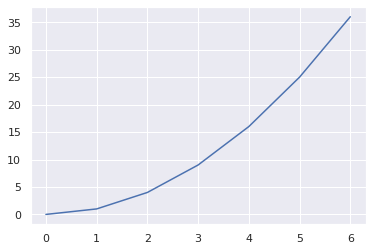

In [ ]:
plt.plot(x_array, xceros)
plt.show()

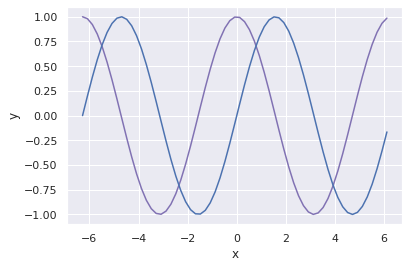

In [ ]:
x =np.arange(-2*np.pi, 2*np.pi,0.2)
y1=np.cos(x)
y2=np.sin(x)
plt.plot(x, y1, color ="m", label = "Coseno")
plt.plot(x, y2, "b", label="seno")
plt.xlabel("x")
plt.ylabel("y")
plt.legend
plt.show()

In [ ]:
ruta = "/content/drive/MyDrive/train/"
name = "train"
data = np.loadtxt(ruta + name)
print(data)

In [ ]:
def Funcion():

  return 

In [ ]:
resultado = Funcion()
print(resultado)

## Redes Neuronales

Primer Ejercicio

Neural networks deep learning coursera

In [ ]:
import glob #Sirve para 
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
from PIL import Image  #Trabajar con imagenes
from scipy import ndimage #Similar a numpy

%matplotlib inline  
####Graficas salgan en notebook 

In [ ]:
from google.colab import drive
drive.mount ("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
files = glob.glob("/content/drive/MyDrive/train/*") #Nos busca todos los archivos dentro de la direccion y el /* indica todos los archivos #Kaggle vienen datos para entrenar redes

In [ ]:
print(len(files))

4340


In [ ]:
#numero de pixeles para nuestras imágenes. 
num_px=64

In [ ]:
#Preparamos el dataset de entrenamiento:
train_x=[]
train_y=[]
for file in files[0:100]:
  img = Image.open(file)
  img=img.resize((num_px,num_px))
  data= np.asarray(img)
  train_x.append(data)
  img.close()
  if "dog" in file:
    train_y.append(1)
  if "cat" in file:
    train_y.append(0)
train_y = np.asarray(train_y)
train_x=np.asarray(train_x)


In [ ]:
print(len(train_x))

100


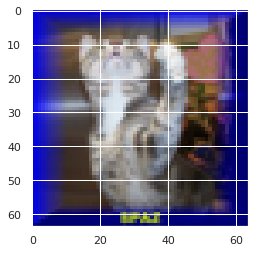

In [ ]:
plt.imshow(train_x[53]) #Mostrar imagen

In [ ]:
#Preparamos el dataset de prueba:
test_x=[]
test_y=[]
for file in files[4300:]:
    #print(file)
    img=Image.open(file)
    img=img.resize((num_px,num_px))
    data=np.asarray(img)
    test_x.append(data)
    img.close()
    if 'dog' in file:
        test_y.append(1)
    if 'cat' in file: 
        test_y.append(0)
test_y=np.asarray(test_y)
test_x=np.asarray(test_x)


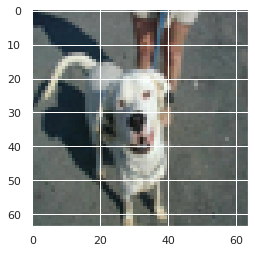

In [ ]:
plt.imshow(test_x[1]) #Mostrar imagen

In [ ]:
np.shape(train_x)

(100, 64, 64, 3)

In [ ]:
#Hacemos una transformacion de los arreglos que contienen las imágenes para que sean arreglos de una sola dimension 
train_x_flatten = train_x.reshape(train_x.shape[0], -1).T
test_x_flatten = test_x.reshape(test_x.shape[0], -1).T

train_set_y = train_y.reshape(1, train_y.shape[0]).T
test_set_y = test_y.reshape(1, test_x.shape[0]).T


In [ ]:
#Normalizamos las imagenes:
train_set_x = train_x_flatten/255
test_set_x= test_x_flatten/255

In [ ]:
#len(train_set_y)
len(test_set_y)

40

In [ ]:
#DEfinimos ahora la arquitectura de nuestra neurona
#Definimos funciones importantes


In [ ]:
#Funcion de activación Sigmoide
def sigmoid(z):
  s=1./(1+np.exp(-z))
  return s

In [ ]:
#data_z = np.linspace(-10, 10, 100) #alternativa: np.arange(-10,10,0.2) es decir, defines el espaciado
#funcionSigmoide =sigmoid(data_z)
#plt.plot(data_z, funcionSigmoide)
#plt.show()

In [ ]:
#Inicializamos los pesos y los sesgos a cero. 
def initialize_with_zeros(dim):
    w=np.zeros((dim,1))
    b=0.
    return w, b

In [ ]:
#Calculamos nuestra función de activación, función de costo y las derivadas, dw y db
#Prediccion "y" gorrito= Activacion "alfa"
def propagate(w, b, X, Y):
    m = X.shape[1]
    A=sigmoid(np.dot(w.T,X)+b)
    cost = -(1./m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))
    dw = (1/m)* np.dot(X,(A-Y).T)
    db = (1/m)* np.sum(A-Y)
    cost = np.squeeze(np.array(cost))
    grads = {"dw": dw,
             "db": db}
    return grads, cost

In [ ]:
#Realizamos la optimización de nuestra red. 

def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False): 
    # esta funcion sirve para optimizar y encontrar el valor más conveniente para nuestros parametros.

    #Learning rate numero bajo para que sea una fraccion del gradiente y vaya buscando en pasos pequeños (tamaño del paso)
    #
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    
    costs = []
    
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]
        w=w-learning_rate*dw
        b=b-learning_rate*db
        
        if i % 100 == 0:
            costs.append(cost)
            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [ ]:
#Calculamos la predicción que hace nuestra función
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T,X)+b)
     
    for i in range(A.shape[1]):
        if A[0,i]>0.5:
            Y_prediction[0,i] = int(1)
        else:
            Y_prediction[0,i] = int(0)
    
    return Y_prediction

In [ ]:

#Ponemos todo junto en nuestro modelo 
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):  
    w,b=initialize_with_zeros(X_train.shape[0])
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations=num_iterations, learning_rate=learning_rate, print_cost=print_cost)
    w=params["w"]
    b=params["b"]
    
    Y_prediction_test = predict(w,b,X_test)
    Y_prediction_train = predict(w,b,X_train)
    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) *100 ))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) *100 ))
        
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [1]:
logistic_regression_model = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=4000, learning_rate=0.01, print_cost=True)

NameError: ignored

IndexError: ignored

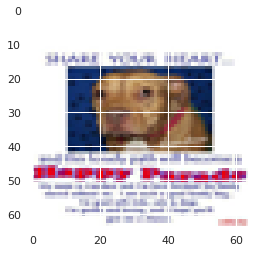

In [ ]:
index=6
plt.imshow(test_set_x[:, index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + str(logistic_regression_model['Y_prediction_test'][0,index]))